## <font color="red"> **Credit Card Fraud** </font>

_______________________

<font color="blue"> **About the dataset:** </font>


It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.


The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

Update (03/05/2021)
A simulator for transaction data has been released as part of the practical handbook on Machine Learning for Credit Card Fraud Detection - https://fraud-detection-handbook.github.io/fraud-detection-handbook/Chapter_3_GettingStarted/SimulatedDataset.html. We invite all practitioners interested in fraud detection datasets to also check out this data simulator, and the methodologies for credit card fraud detection presented in the book.

Acknowledgements
The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection.
More details on current and past projects on related topics are available on https://www.researchgate.net/project/Fraud-detection-5 and the page of the DefeatFraud project

Please cite the following works:

Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015

Dal Pozzolo, Andrea; Caelen, Olivier; Le Borgne, Yann-Ael; Waterschoot, Serge; Bontempi, Gianluca. Learned lessons in credit card fraud detection from a practitioner perspective, Expert systems with applications,41,10,4915-4928,2014, Pergamon

Dal Pozzolo, Andrea; Boracchi, Giacomo; Caelen, Olivier; Alippi, Cesare; Bontempi, Gianluca. Credit card fraud detection: a realistic modeling and a novel learning strategy, IEEE transactions on neural networks and learning systems,29,8,3784-3797,2018,IEEE

Dal Pozzolo, Andrea Adaptive Machine learning for credit card fraud detection ULB MLG PhD thesis (supervised by G. Bontempi)

Carcillo, Fabrizio; Dal Pozzolo, Andrea; Le Borgne, Yann-Aël; Caelen, Olivier; Mazzer, Yannis; Bontempi, Gianluca. Scarff: a scalable framework for streaming credit card fraud detection with Spark, Information fusion,41, 182-194,2018,Elsevier

Carcillo, Fabrizio; Le Borgne, Yann-Aël; Caelen, Olivier; Bontempi, Gianluca. Streaming active learning strategies for real-life credit card fraud detection: assessment and visualization, International Journal of Data Science and Analytics, 5,4,285-300,2018,Springer International Publishing

Bertrand Lebichot, Yann-Aël Le Borgne, Liyun He, Frederic Oblé, Gianluca Bontempi Deep-Learning Domain Adaptation Techniques for Credit Cards Fraud Detection, INNSBDDL 2019: Recent Advances in Big Data and Deep Learning, pp 78-88, 2019

Fabrizio Carcillo, Yann-Aël Le Borgne, Olivier Caelen, Frederic Oblé, Gianluca Bontempi Combining Unsupervised and Supervised Learning in Credit Card Fraud Detection Information Sciences, 2019

Yann-Aël Le Borgne, Gianluca Bontempi Machine Learning for Credit Card Fraud Detection - Practical Handbook

___________________________________________________________________

In [1]:
#importing required libraries

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score

from collections import Counter

import seaborn as sns

from sklearn.preprocessing import StandardScaler, RobustScaler

from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
#installing imbalanced-learn to deal with imbalanced ratio

pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
#importing SMOTE from imblearn.over_sampling
from imblearn.over_sampling import SMOTE

_________________________________________________________

In [3]:
df = pd.read_csv('creditcard.csv')
df.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
204575,135341.0,0.033600,0.546406,-1.185867,-1.730097,2.931412,3.402158,0.338091,0.925294,-0.165739,...,-0.266201,-0.716276,0.108303,0.688524,-0.460268,0.161939,0.265407,0.090224,1.78,0
238858,149853.0,2.052697,-0.097179,-1.077250,0.414174,-0.158841,-1.141349,0.135204,-0.279767,0.618437,...,-0.289231,-0.717999,0.352996,-0.027398,-0.331048,0.202778,-0.070982,-0.061577,1.98,0
130847,79444.0,1.246963,-0.333898,0.915006,-0.726932,-1.192320,-0.820594,-0.558847,-0.044765,1.790770,...,-0.009990,0.230930,-0.038040,0.415055,0.506971,-0.687280,0.094970,0.035733,1.00,0
84808,60470.0,-0.342543,1.148682,1.295404,0.060443,0.037345,-0.968427,0.746917,-0.090704,-0.438897,...,-0.259020,-0.666302,-0.011212,0.341452,-0.150170,0.070814,0.246481,0.099022,6.64,0
50946,44713.0,1.207539,0.781178,0.123243,2.485424,0.273885,-0.814868,0.641936,-0.335802,-1.191016,...,0.002172,0.003307,-0.124951,0.421939,0.755934,0.063939,-0.036160,0.014096,14.70,0
282104,170658.0,-1.374911,1.875354,-0.747495,-0.624739,-0.355120,-1.106055,0.033303,-0.135077,0.027280,...,0.527255,-0.877533,0.301855,0.025384,-0.311865,0.156821,0.252554,0.093443,8.99,0
159607,112715.0,2.096923,-1.029668,-1.772872,-1.169236,-0.159514,-0.432954,-0.363974,-0.229456,-0.705065,...,0.478810,1.197381,-0.232774,-1.028267,0.277469,0.113805,-0.055549,-0.071070,95.75,0
70977,54099.0,1.154422,0.515132,0.280671,2.462147,0.100153,-0.277313,0.230500,0.002199,-0.706222,...,-0.032739,-0.171593,-0.011112,0.035937,0.484751,0.040037,-0.021916,0.010556,10.86,0
91420,63463.0,-0.600729,1.331856,1.184261,-0.054095,0.252933,-0.511229,0.679107,0.025629,-0.344507,...,-0.256740,-0.522769,0.009254,0.043719,-0.152810,0.103159,0.374530,0.156585,1.29,0
8331,11122.0,1.220430,-0.175689,0.651923,0.124263,-0.762280,-0.562846,-0.534045,0.031920,2.054094,...,-0.279067,-0.655593,0.159053,0.007760,-0.067006,0.902695,-0.099399,-0.003854,13.04,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**So we see there isn't a null value in our data**

In [6]:
df.Class.value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

**Since the class is imbalanced we will use SMOTE to balance the data. SMOTE stands for Synthetic Minority Oversampling TEchnique.**

SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

Specifically, a random example from the minority class is first chosen. Then k of the nearest neighbors for that example are found (typically k=5). A randomly selected neighbor is chosen and a synthetic example is created at a randomly selected point between the two examples in feature space.

In [7]:
X=df.drop('Class', axis=1)
y=df['Class']

In [8]:
X_resampled, y_resampled = SMOTE().fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))

[(0, 284315), (1, 284315)]


In [9]:
df1=pd.concat([X_resampled,y_resampled], axis=1)

In [10]:
df1.Class.value_counts(normalize=True)

1    0.5
0    0.5
Name: Class, dtype: float64

<AxesSubplot:xlabel='Time', ylabel='Density'>

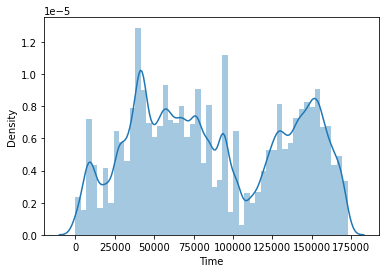

In [11]:
sns.distplot(df1['Time'])

<AxesSubplot:xlabel='Amount', ylabel='Density'>

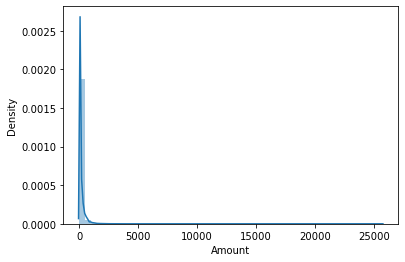

In [12]:
sns.distplot(df1['Amount'])

<AxesSubplot:xlabel='Time', ylabel='Amount'>

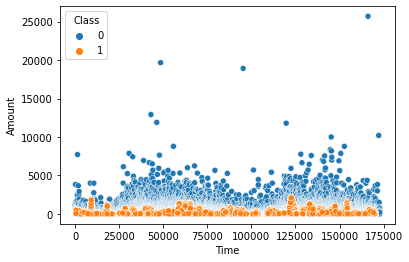

In [13]:
sns.scatterplot(x='Time', y='Amount', hue='Class', data=df1)

In [18]:
rob_scaler = RobustScaler()

df1['Amount'] = rob_scaler.fit_transform(df1['Amount'].values.reshape(-1, 1))
df1['Time'] = rob_scaler.fit_transform(df1['Time'].values.reshape(-1, 1))

In [19]:
# Split dataset up into train and test sets
X=df1.drop('Class', axis=1)
y=df1['Class']
X_train,X_test, y_train, y_test= train_test_split(X,y, test_size=0.2)

In [20]:
# defining our predictor function, which returns a accuracy score

def predict(model,X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    preds=model.predict(X_test)
    return accuracy_score(y_test,preds)

In [21]:
LR = LogisticRegression()
XGBC = XGBClassifier()
GNB = GaussianNB()
KNN = KNeighborsClassifier()
DTC = DecisionTreeClassifier()
RFC = RandomForestClassifier()
ABC = AdaBoostClassifier()
GBC = GradientBoostingClassifier()

In [27]:
Models = [LR,XGBC,GNB,KNN,DTC,RFC,ABC,GBC]

In [28]:
Algorithms = ["LogisticRegression","XGBClassifier","GaussianNB","KNeighborsClassifier","DecisionTreeClassifier","RandomForestClassifier","AdaBoostClassifier","GradientBoostingClassifier"]

In [29]:
scores = []
for i in Models:
    a = predict(i, X_train, X_test, y_train, y_test)
    scores.append(a)

[19:15:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [30]:
scores

[0.981130084589276,
 0.9998329317834093,
 0.9248456817262544,
 0.9993141410055748,
 0.9986986265233984,
 0.9998856901675958,
 0.9809630163726852,
 0.9874610906916624]

In [41]:
data = {'Algorithms': Algorithms, 'Scores': scores}
df2 = pd.DataFrame(data=data)
df2.sort_values(by=['Scores'],ascending=False,ignore_index=True,inplace=True)
df2

,Algorithms,Scores
0,RandomForestClassifier,0.999886
1,XGBClassifier,0.999833
2,KNeighborsClassifier,0.999314
3,DecisionTreeClassifier,0.998699
4,GradientBoostingClassifier,0.987461
5,LogisticRegression,0.981130
6,AdaBoostClassifier,0.980963
7,GaussianNB,0.924846


## <font color="Red">Result:</font> So we see <font color ="green">Random Forest Classifier</font> has the best score in the 8 algorithms which were used.

___________________________